In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

dpath = r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data'

In [12]:
def is_float(string):
    if string.replace(".", "").isnumeric() or string.isnumeric():
        return True
    else:
        return False

def parse_clean_log(path):
    # testpath = r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data\17\ZTF17aaaacjo\ZTF17aaaacjo_clean_log.json'
    with open(path,'r') as file: 
        logfile = json.load(file)

    green = []
    red = []

    for filt in logfile.keys():
        if filt == 'ZTF_i': #we don't care
            continue
        subdict = logfile[filt]
        if not subdict['no_viable_data']: #if there is viable data:
            # print(subdict)
            for field in subdict.keys():
                if is_float(field): #there's more subdicts than only the fields
                    fielddict = subdict[field]
                    if not bool(fielddict['no_viable_data']):
                        # print(len(green),len(red))
                        if bool(fielddict['primary_field']): #if we got the primary field
                            # print(filt,int(fielddict['amount_before_cleaning']),int(fielddict['removed_in_cleaning']))
                            before_cleaning = int(fielddict['amount_before_cleaning'])
                            after_cleaning = before_cleaning - int(fielddict['removed_in_cleaning']) #get amount left not removed
                            if filt == 'ZTF-g' and (len(green) != 2):
                                green.append(before_cleaning)
                                green.append(after_cleaning)
                            elif filt == 'ZTF-r' and (len(red) != 2):
                                red.append(before_cleaning)
                                red.append(after_cleaning)
                            
        else: #if a certain filter has no viable data there's just 0s
            if filt == 'ZTF-g':
                green.append(0)
                green.append(0)
            elif filt == 'ZTF-r':
                red.append(0)
                red.append(0)
            
            continue
            # return green,red

    if len(green) == 0:
        green = [0,0]
    if len(red) == 0:
        red = [0,0]

    return green,red

def gather_clean_amount():
    amount_before_cleaning_g = []
    amount_before_cleaning_r = []

    amount_after_cleaning_g = []
    amount_after_cleaning_r = []

    for year in os.listdir(dpath):
        if year.isnumeric():
            yearpath = os.path.join(dpath,year)
            for ztf in os.listdir(yearpath)[1:]:
                # print(ztf)
                ztfpath = os.path.join(yearpath,ztf)
                for datafile in os.listdir(ztfpath):
                    if 'clean_log' in datafile:
                        clean_log_path = os.path.join(ztfpath,datafile)
                        green,red = parse_clean_log(clean_log_path) #both ordered as nbefore,nafter
                        # print(green,red)

                        n_before_g,n_after_g = green
                        n_before_r,n_after_r = red


                        amount_after_cleaning_g.append(n_after_g)
                        amount_before_cleaning_g.append(n_before_g)

                        amount_after_cleaning_r.append(n_after_r)
                        amount_before_cleaning_r.append(n_before_r)

    return amount_after_cleaning_g,amount_after_cleaning_r,amount_before_cleaning_g,amount_before_cleaning_r



In [13]:
amount_after_cleaning_g,amount_after_cleaning_r,amount_before_cleaning_g,amount_before_cleaning_r = gather_clean_amount()


1311


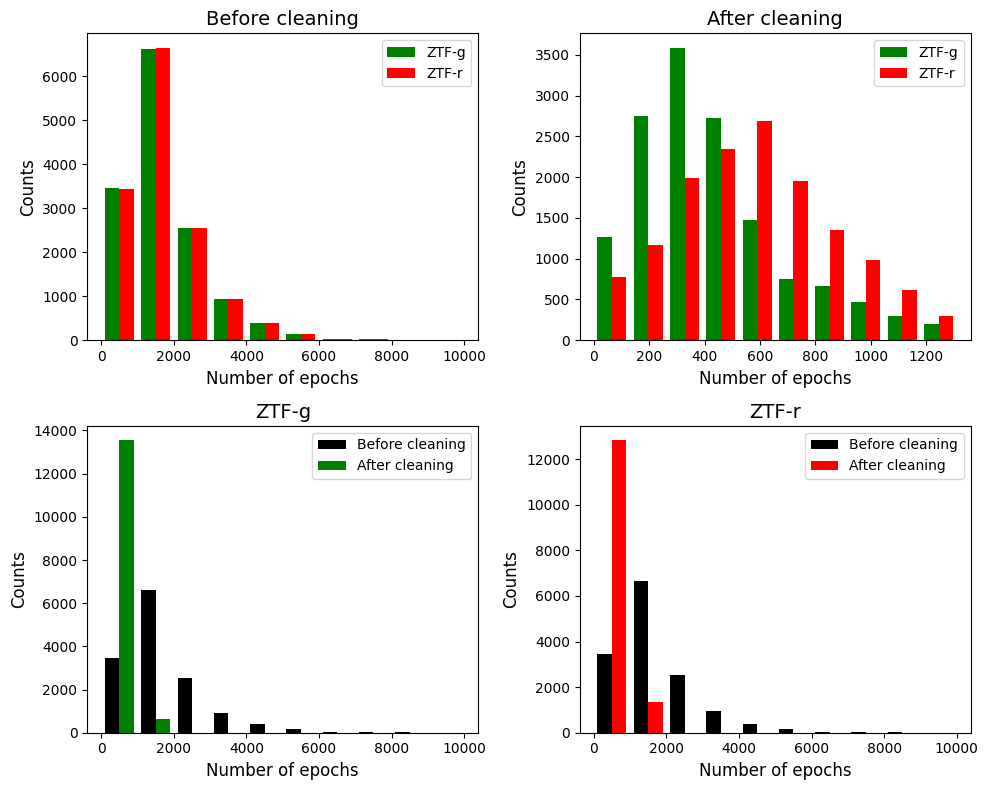

In [44]:
colors = ['green','red']
fig,((ax00,ax01),(ax10,ax11)) = plt.subplots(nrows=2,ncols=2,layout='tight',figsize=(10,8))
for ax in (ax00,ax01,ax10,ax11):
    ax.set_ylabel('Counts',fontsize=12)
    ax.set_xlabel('Number of epochs',fontsize=12)

ax00.set_title('Before cleaning',fontsize=14)
ax00.hist([amount_before_cleaning_g,amount_before_cleaning_r],color=colors,label=['ZTF-g','ZTF-r'],histtype='bar')
# ticks = np.array(ax00.get_xticks(),dtype=int)
# ax00.set_xticks(ticks+500,ticks)
# ax00.set_xlim(0,np.max([amount_before_cleaning_g,amount_before_cleaning_r]))
ax00.legend()

ax01.set_title('After cleaning',fontsize=14)
ax01.hist([amount_after_cleaning_g,amount_after_cleaning_r],color=colors,label=['ZTF-g','ZTF-r'])
# ticks = np.array(ax01.get_xticks(),dtype=int)
# ax01.set_xticks(ticks+60,ticks)
# ax01.set_xlim(0,np.max([amount_after_cleaning_g,amount_after_cleaning_r]))
ax01.legend()
print(np.max([amount_after_cleaning_g,amount_after_cleaning_r]))

ax10.set_title('ZTF-g',fontsize=14)
ax10.hist([amount_before_cleaning_g,amount_after_cleaning_g],color=['black','green'],label=['Before cleaning','After cleaning'])
# ticks = np.array(ax10.get_xticks(),dtype=int)
# ax10.set_xticks(ticks+500,ticks)
# ax10.set_xlim(0,np.max([amount_before_cleaning_g,amount_after_cleaning_g]))
ax10.legend()

ax11.set_title('ZTF-r',fontsize=14)
ax11.hist([amount_before_cleaning_r,amount_after_cleaning_r],color=['black','red'],label=['Before cleaning','After cleaning'])
# ticks = np.array(ax11.get_xticks(),dtype=int)
# ax11.set_xticks(ticks+500,ticks)
# ax11.set_xlim(0,np.max([amount_before_cleaning_r,amount_after_cleaning_r]))
ax11.legend()
plt.tight_layout()
plt.savefig(os.path.join(r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Plots','cleaning_data_removal.pdf'),bbox_inches='tight')
plt.show()